In [1]:
from SurfaceQ import *


In [2]:
def execute_model(k0,k1 , p_error,error_type,num_shots, decoder_option=None, success=True, report_error=False):

    success_rate = 0
    surface_code = RotatedSurfaceCode(k0,k1)
    # LatticeCircuit = surface_code.LatticeCircuit
    
    for i in range(num_shots):
        
        # # if require_reset:
        # if require_reset:
        #     surface_code.reset()
        #     LatticeCircuit = surface_code.LatticeCircuit
        surface_code.single_round(p_error, error_type, decoder_option)
        
        job = AerSimulator().run(surface_code.LatticeCircuit, shots=1, memory=True)
        result = job.result()
        memory = result.get_memory(surface_code.LatticeCircuit)
        memory_result = memory[0].replace(' ','')
        if report_error:
            print(memory_result)
        if memory_result[0] == '0':
            success_rate += 1
            # require_reset = False
        # else:
        #     # require_reset = True
        surface_code.reset()      
            
    if success == True:      
        return  success_rate/num_shots
    
    if success == False:
        return 1 - (success_rate/num_shots) 

In [3]:


error_rates = np.linspace(0.04, 0.18, 7)

logical_error_rates_3x3m = [execute_model( 3, 3, p, 'depolarizing', 3000, decoder_option='MWPM', success=False) for p in error_rates]
print( 'Done testing 3x3  lattice.. ')
logical_error_rates_5x5m = [execute_model( 5, 5, p,  'depolarizing', 3000, decoder_option='MWPM', success=False) for p in error_rates]
print( 'Done testing 5x5  lattice.. ')
logical_error_rates_7x7m = [execute_model( 7, 7, p,  'depolarizing', 3000, decoder_option='MWPM'  ,success=False) for p in error_rates]
print( 'Done testing 7x7  lattice.. ')
logical_error_rates_9x9m = [execute_model(9, 9, p,  'depolarizing', 3000,decoder_option='MWPM',  success=False) for p in error_rates]
print( 'Done testing 9x9 lattice.. ')
logical_error_rates_11x11m = [execute_model(11, 11, p,  'depolarizing', 3000, decoder_option='MWPM', success=False) for p in error_rates]
print( 'Done testing 11x11 lattice.. ')
logical_error_rates_13x13m = [execute_model(13, 13, p, 'depolarizing', 3000, decoder_option='MWPM', success=False) for p in error_rates]
print( 'Done testing 13x13 lattice.. ')
logical_error_rates_15x15m = [execute_model(15, 15, p, 'depolarizing', 3000, decoder_option='MWPM', success=False) for p in error_rates]
print( 'Done testing 15x15 lattice.. ')


Done testing 3x3  lattice.. 
Done testing 5x5  lattice.. 
Done testing 7x7  lattice.. 
Done testing 9x9 lattice.. 
Done testing 11x11 lattice.. 
Done testing 13x13 lattice.. 
Done testing 15x15 lattice.. 


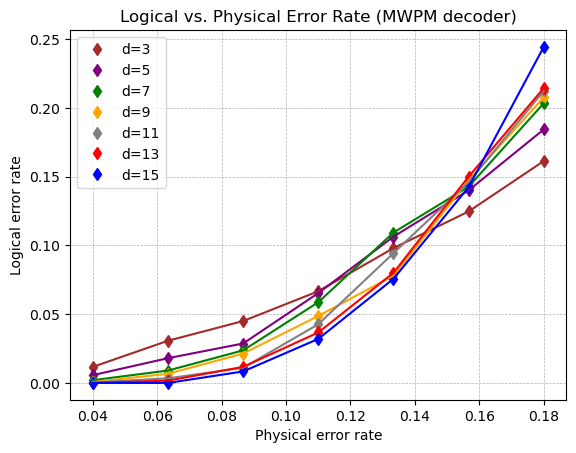

In [4]:


plt.plot(error_rates, logical_error_rates_3x3m, 'd', color='brown', label='d=3')
plt.plot(error_rates, logical_error_rates_5x5m, 'd', color='purple', label='d=5')
plt.plot(error_rates, logical_error_rates_7x7m, 'd', color='green', label='d=7')
plt.plot(error_rates, logical_error_rates_9x9m, 'd', color='orange', label='d=9')
plt.plot(error_rates, logical_error_rates_11x11m, 'd', color='grey', label='d=11')
plt.plot(error_rates, logical_error_rates_13x13m, 'd', color='red', label='d=13')
plt.plot(error_rates, logical_error_rates_15x15m, 'd', color='blue', label='d=15')

plt.plot(error_rates, logical_error_rates_3x3m,  color='brown')
plt.plot(error_rates, logical_error_rates_5x5m,  color='purple')
plt.plot(error_rates, logical_error_rates_7x7m, color='green')
plt.plot(error_rates, logical_error_rates_9x9m,  color='orange')
plt.plot(error_rates, logical_error_rates_11x11m, color='grey')
plt.plot(error_rates, logical_error_rates_13x13m, color='red')
plt.plot(error_rates, logical_error_rates_15x15m,  color='blue')


plt.title('Logical vs. Physical Error Rate (MWPM decoder)')
plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Done testing 3x3  lattice.. 
Done testing 5x5  lattice.. 
Done testing 7x7  lattice.. 
Done testing 9x9 lattice.. 
Done testing 11x11 lattice.. 
Done testing 13x13 lattice.. 
Done testing 15x15 lattice.. 


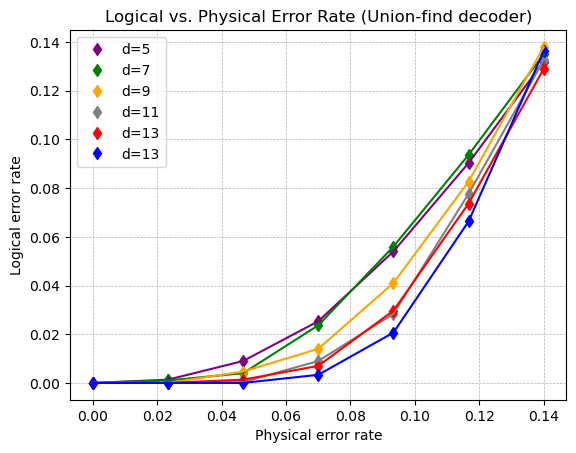

In [5]:
error_rates = np.linspace(0, 0.14, 7)

logical_error_rates_3x3 = [execute_model( 3, 3, p, 'depolarizing', 3000, decoder_option='union-find', success=False) for p in error_rates]
print( 'Done testing 3x3  lattice.. ')
logical_error_rates_5x5 = [execute_model( 5, 5, p,  'depolarizing', 3000, decoder_option='union-find', success=False) for p in error_rates]
print( 'Done testing 5x5  lattice.. ')
logical_error_rates_7x7 = [execute_model( 7, 7, p,  'depolarizing', 3000, decoder_option='union-find', success=False) for p in error_rates]
print( 'Done testing 7x7  lattice.. ')
logical_error_rates_9x9 = [execute_model(9, 9, p,  'depolarizing', 3000, decoder_option='union-find', success=False) for p in error_rates]
print( 'Done testing 9x9 lattice.. ')
logical_error_rates_11x11 = [execute_model(11, 11, p,  'depolarizing', 3000, decoder_option='union-find',  success=False) for p in error_rates]
print( 'Done testing 11x11 lattice.. ')
logical_error_rates_13x13 = [execute_model(13, 13, p, 'depolarizing', 3000, decoder_option='union-find', success=False) for p in error_rates]
print( 'Done testing 13x13 lattice.. ')
logical_error_rates_15x15 = [execute_model(15, 15, p, 'depolarizing', 3000, decoder_option='union-find', success=False) for p in error_rates]
print( 'Done testing 15x15 lattice.. ')
# logical_error_rates_11x11 = [execute_model( 11, 11, p, 2000, success=False) for p in error_rates]
# print( 'Done testing 11x11 lattice.. ')
# logical_error_rates_13x13 = [execute_model( 13,13 , p, 2000, success=False) for p in error_rates]
# print( 'Done testing 13x13  lattice.. ')

# plt.plot(error_rates, logical_error_rates_3x3a, 'd', color='blue', label='d=3')
plt.plot(error_rates, logical_error_rates_5x5, 'd', color='purple', label='d=5')
plt.plot(error_rates, logical_error_rates_7x7, 'd', color='green', label='d=7')
plt.plot(error_rates, logical_error_rates_9x9, 'd', color='orange', label='d=9')
plt.plot(error_rates, logical_error_rates_11x11, 'd', color='grey', label='d=11')
plt.plot(error_rates, logical_error_rates_13x13, 'd', color='red', label='d=13')
plt.plot(error_rates, logical_error_rates_15x15, 'd', color='blue', label='d=13')


# plt.plot(error_rates, logical_error_rates_3x3a,  color='blue')
plt.plot(error_rates, logical_error_rates_5x5,  color='purple')
plt.plot(error_rates, logical_error_rates_7x7, color='green')
plt.plot(error_rates, logical_error_rates_9x9,  color='orange')
plt.plot(error_rates, logical_error_rates_11x11, color='grey')
plt.plot(error_rates, logical_error_rates_13x13, color='red')
plt.plot(error_rates, logical_error_rates_15x15, color='blue')

plt.title('Logical vs. Physical Error Rate (Union-find decoder)')
plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

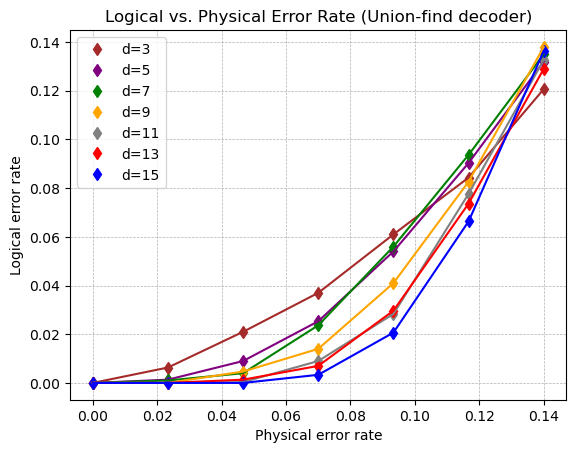

In [6]:

plt.plot(error_rates, logical_error_rates_3x3, 'd',  color='brown', label='d=3')
plt.plot(error_rates, logical_error_rates_5x5, 'd', color='purple', label='d=5')
plt.plot(error_rates, logical_error_rates_7x7, 'd', color='green', label='d=7')
plt.plot(error_rates, logical_error_rates_9x9, 'd', color='orange', label='d=9')
plt.plot(error_rates, logical_error_rates_11x11, 'd', color='grey', label='d=11')
plt.plot(error_rates, logical_error_rates_13x13, 'd', color='red', label='d=13')
plt.plot(error_rates, logical_error_rates_15x15, 'd', color='blue', label='d=15')


plt.plot(error_rates, logical_error_rates_3x3,  color='brown')
plt.plot(error_rates, logical_error_rates_5x5,  color='purple')
plt.plot(error_rates, logical_error_rates_7x7, color='green')
plt.plot(error_rates, logical_error_rates_9x9,  color='orange')
plt.plot(error_rates, logical_error_rates_11x11, color='grey')
plt.plot(error_rates, logical_error_rates_13x13, color='red')
plt.plot(error_rates, logical_error_rates_15x15, color='blue')

plt.title('Logical vs. Physical Error Rate (Union-find decoder)')
plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Done testing 3x3  lattice.. 
Done testing 5x5  lattice.. 
Done testing 7x7  lattice.. 
Done testing 9x9 lattice.. 
Done testing 11x11 lattice.. 
Done testing 13x13  lattice.. 


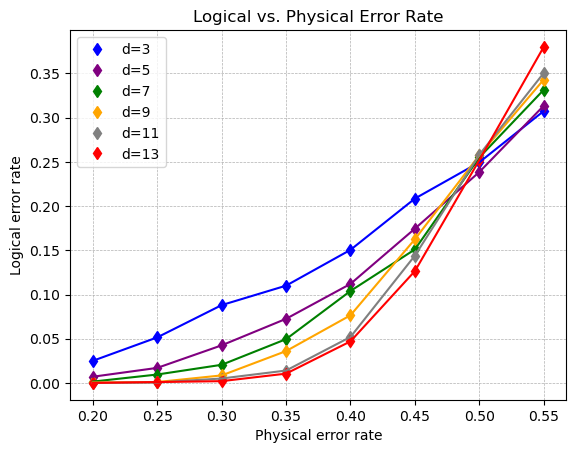

In [7]:
error_rates = np.linspace(0.20, 0.55, 8)

logical_error_rates_3x3 = [execute_model( 3, 3, p, 'erasure', 2000, success=False) for p in error_rates]
print( 'Done testing 3x3  lattice.. ')
logical_error_rates_5x5 = [execute_model( 5, 5, p,  'erasure', 2000, success=False) for p in error_rates]
print( 'Done testing 5x5  lattice.. ')
logical_error_rates_7x7 = [execute_model( 7, 7, p,  'erasure', 2000, success=False) for p in error_rates]
print( 'Done testing 7x7  lattice.. ')
logical_error_rates_9x9 = [execute_model(9, 9, p,  'erasure',  2000, success=False) for p in error_rates]
print( 'Done testing 9x9 lattice.. ')
logical_error_rates_11x11 = [execute_model( 11, 11, p,  'erasure',  2000, success=False) for p in error_rates]
print( 'Done testing 11x11 lattice.. ')
logical_error_rates_13x13 = [execute_model( 13,13 , p,  'erasure',  2000, success=False) for p in error_rates]
print( 'Done testing 13x13  lattice.. ')

plt.plot(error_rates, logical_error_rates_3x3, 'd', color='blue', label='d=3')
plt.plot(error_rates, logical_error_rates_5x5, 'd', color='purple', label='d=5')
plt.plot(error_rates, logical_error_rates_7x7, 'd', color='green', label='d=7')
plt.plot(error_rates, logical_error_rates_9x9, 'd', color='orange', label='d=9')
plt.plot(error_rates, logical_error_rates_11x11, 'd', color='grey', label='d=11')
plt.plot(error_rates, logical_error_rates_13x13, 'd', color='red', label='d=13')

plt.plot(error_rates, logical_error_rates_3x3,  color='blue')
plt.plot(error_rates, logical_error_rates_5x5,  color='purple')
plt.plot(error_rates, logical_error_rates_7x7, color='green')
plt.plot(error_rates, logical_error_rates_9x9,  color='orange')
plt.plot(error_rates, logical_error_rates_11x11, color='grey')
plt.plot(error_rates, logical_error_rates_13x13, color='red')


plt.title('Logical vs. Physical Error Rate')
plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
